In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **EDA for Titanic Dataset**

# Importing Libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling

import random
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train_df.profile_report()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

**So from a preliminary analysis of our data we can see that the train set contains 891 rows and 12 columns. Our data contains about 8% of missing values with them being in 'Cabin', 'Age' and 'Embarked' columns.
There are 5 numerical and 7 categorical columns.**

# **Exploratory Data Analysis**

# Basic Data Analysis

In [8]:
train_df.groupby(["Pclass"])["Survived"].sum().reset_index().sort_values(by="Survived",ascending = False)

Pclass  Survived
0       1       136
2       3       119
1       2        87

**Higher class (with 1st being the highest) meant higher survival rates.**

In [9]:
train_df.groupby(["SibSp"])["Survived"].sum().reset_index().sort_values(by="Survived",ascending = False)

SibSp  Survived
0      0       210
1      1       112
2      2        13
3      3         4
4      4         3
5      5         0
6      8         0

**SibSp is inversely proportional to Survived**

In [10]:
train_df.groupby(["Parch"])["Survived"].sum().reset_index().sort_values(by="Survived",ascending = False)

Parch  Survived
0      0       233
1      1        65
2      2        40
3      3         3
5      5         1
4      4         0
6      6         0

**Parch is inversely proportional to Survived.**

# **Visualisation**

# Missing Values

<Figure size 1296x1152 with 0 Axes>

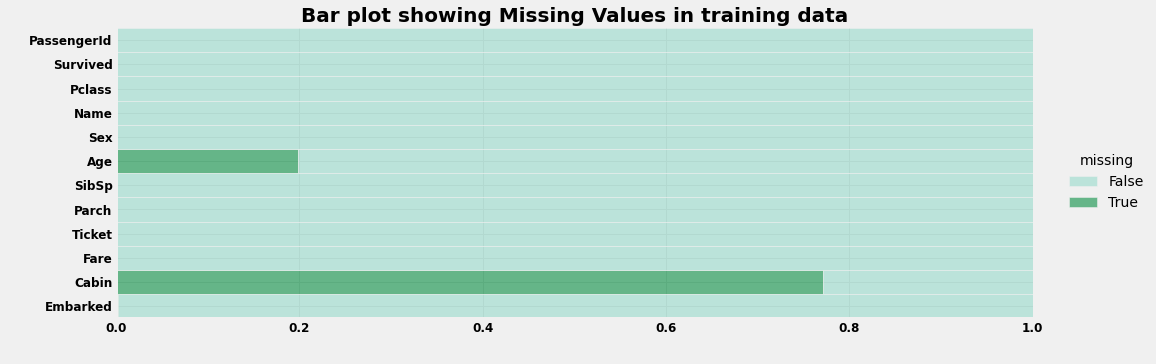

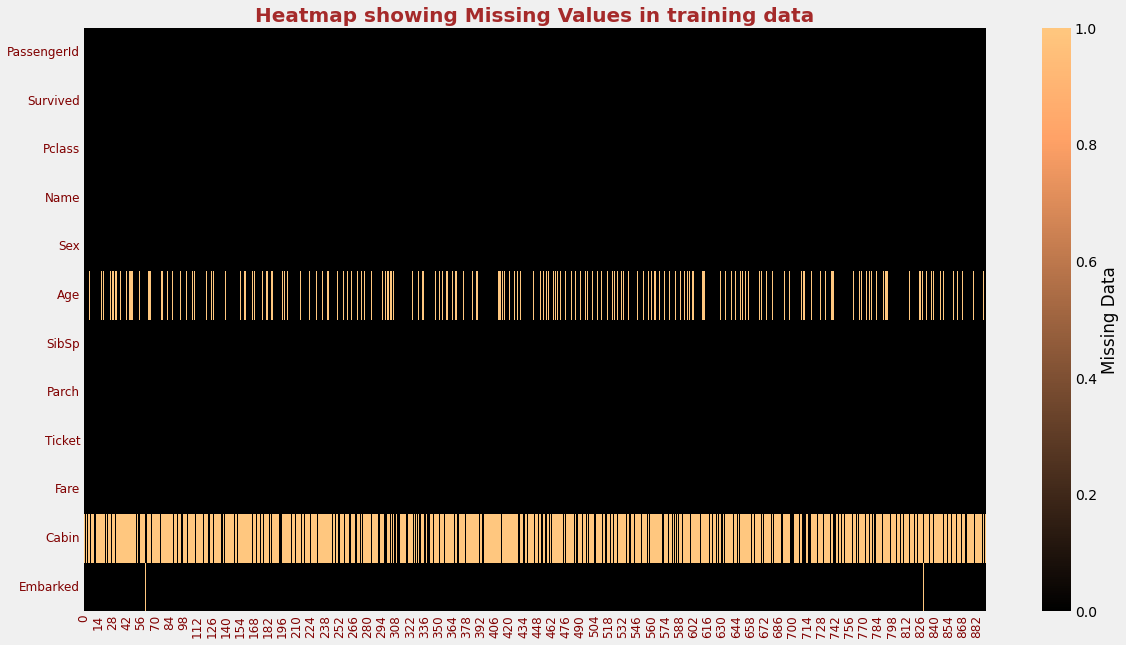

In [11]:
plt.figure(figsize=(18,16))
sns.displot(
    data=train_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=3,
    palette='BuGn'
)
plt.title('Bar plot showing Missing Values in training data', weight = 'bold', size = 20, color = 'black')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(size = 12, weight = 'bold', color = 'black')
plt.yticks(size = 12, weight = 'bold', color = 'black');

plt.figure(figsize=(18,10))
sns.heatmap(train_df.isna().transpose(),
            cmap="copper",
            cbar_kws={'label': 'Missing Data'})
plt.title('Heatmap showing Missing Values in training data', weight = 'bold', size = 20, color = 'brown')
plt.xticks(size = 12, color = 'maroon')
plt.yticks(size = 12, color = 'maroon')
plt.show();

# Correlation Matrix

<AxesSubplot:>

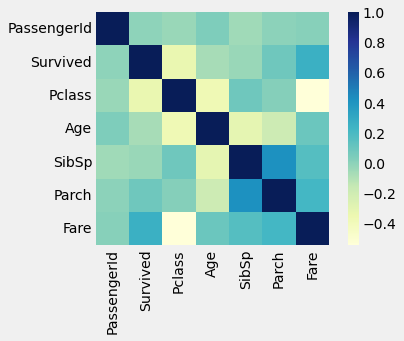

In [12]:
sns.heatmap(train_df.corr(), square=True, cmap="YlGnBu")

**From this we can see that SibSp and Parch have a high correlation which makes sense as SibSp is the number of siblings/spouses onboard and Patch is the number of parets/children onboard. Also fare and survival seems correlated, we'll explore more about it ahead.**

# Dependance of Sex on various features

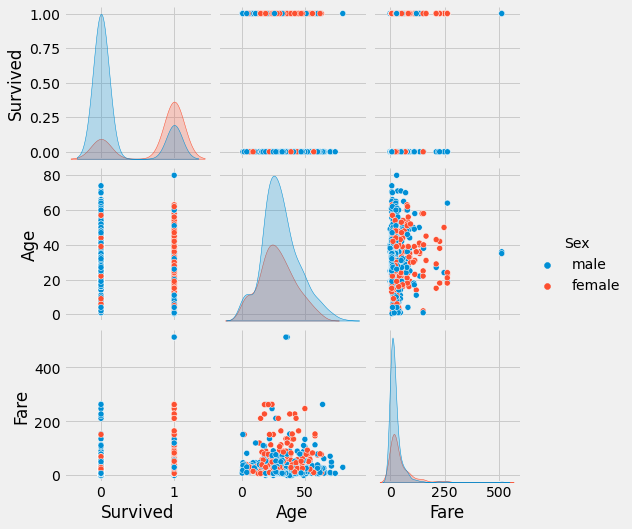

In [13]:
sns.pairplot(train_df,vars=['Survived', 'Age', 'Fare'], hue="Sex")

**From this we can see that gender played an important role in determining survival with majority of females surviving. In age column, we can see that for males, children had a higher rate of survival.**

# Dependence between Survived and other features

In [14]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

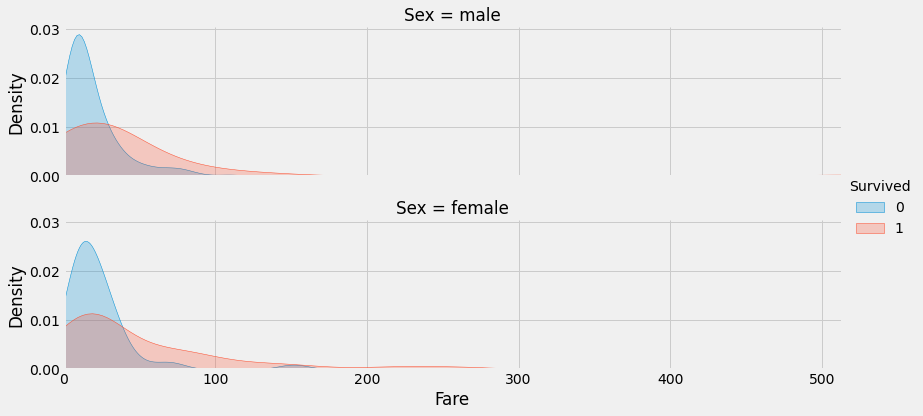

In [15]:
plot_distribution( train_df , var = 'Fare' , target = 'Survived' , row = 'Sex' )

**From this we can see that larger fare did result in a higher rate of survival.**

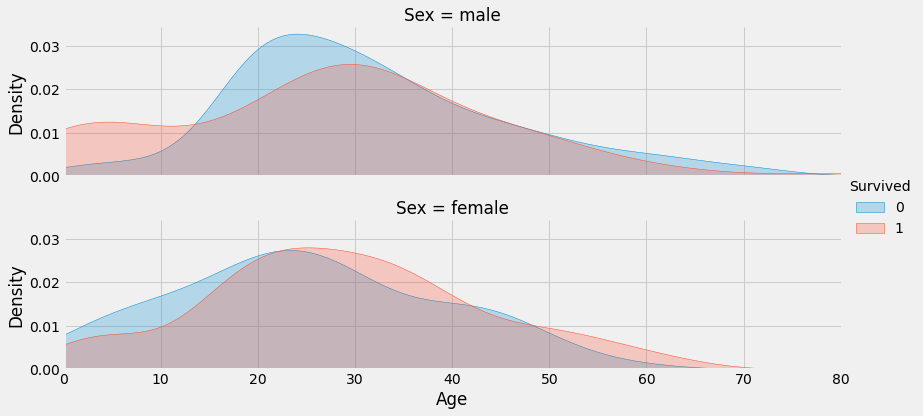

In [16]:
plot_distribution( train_df , var = 'Age' , target = 'Survived' , row = 'Sex' )

**In males highest rate of survival is for those aged 30 and for females it is around 25.**

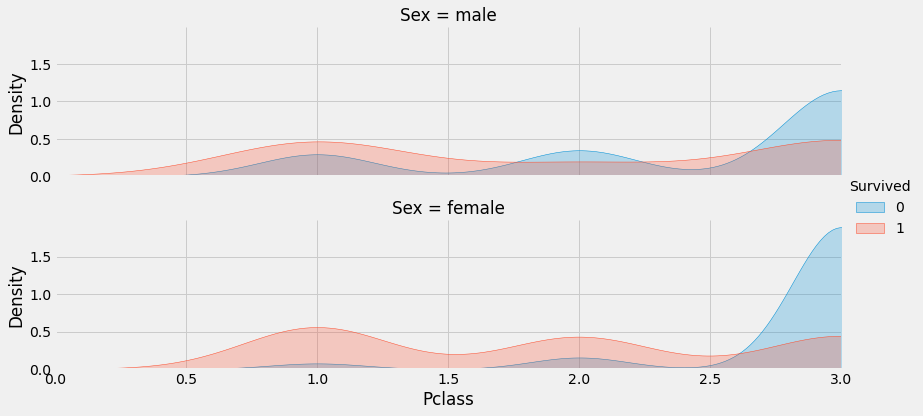

In [17]:
plot_distribution( train_df , var = 'Pclass' , target = 'Survived' , row = 'Sex' )

**People belonging to first class have a higher chance of survival which proves the earlier hypothesis that higher fare led to higher survival.**

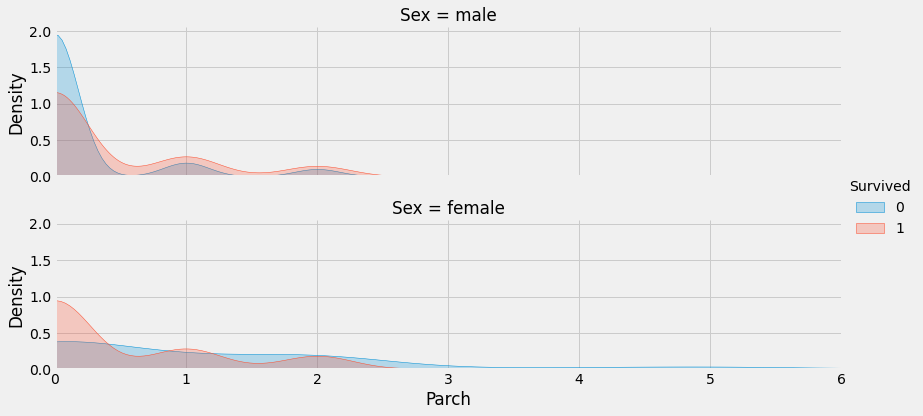

In [18]:
plot_distribution( train_df , var = 'Parch' , target = 'Survived' , row = 'Sex' )

**Thus people with lower parch value had a higher chance of survival.**

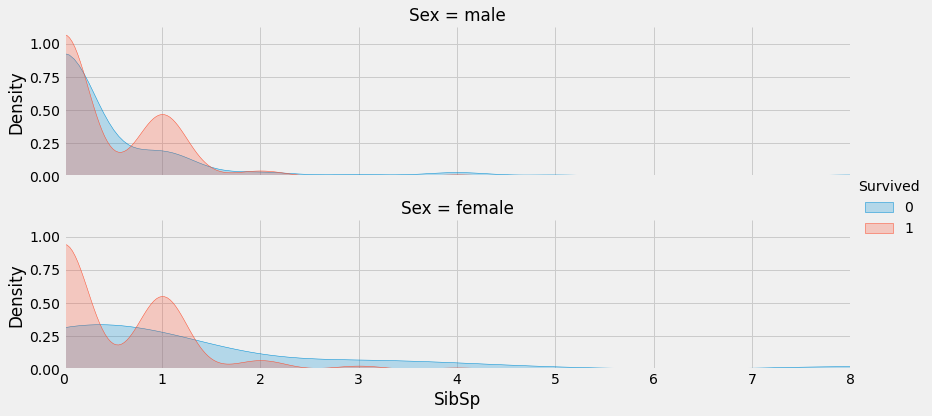

In [19]:
plot_distribution( train_df , var = 'SibSp' , target = 'Survived' , row = 'Sex' )

**Similarly people with lower SibSp value had a higher chance of survival.**